In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
from torch.utils.data import DataLoader
from generation.train.autoencoder import AutoEncoder, run_train, generate_new_signal
from generation.data.data_simulation import Nakagami
from generation.data.dataset_pytorch import SignalsDataset
from generation.train.vanila_gan import run_train, generate_new_signal

In [2]:
# Data params
SAMPLE_SIZE = 50
Q_LOWER = 0.001
Q_UPPER = 0.999
NU_MIN = 0.9
NU_MAX = 1.2
NU_STEP = 0.0001


nakagami = Nakagami(SAMPLE_SIZE, Q_LOWER, Q_UPPER)
nu_values = np.arange(NU_MIN, NU_MAX, NU_STEP)
data = nakagami.get_nakagami_data(nu_values)

In [3]:
LATENT_DIM = 100
BATCH_SIZE = 128
NUM_EPOCHS = 500
LEARNING_RATE = 1e-3
PRINT_EACH = 50
VERBOSE = 1
NO_SAVE = True
DEVICE = 'cuda'


dataset = SignalsDataset(data)

epoch-0; D_loss: 1.6789295673370361; G_loss: 0.47300171852111816


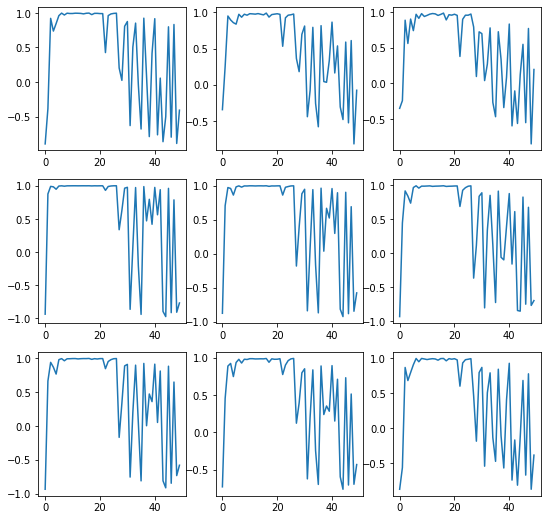

epoch-50; D_loss: 0.27058058977127075; G_loss: 6.453958034515381


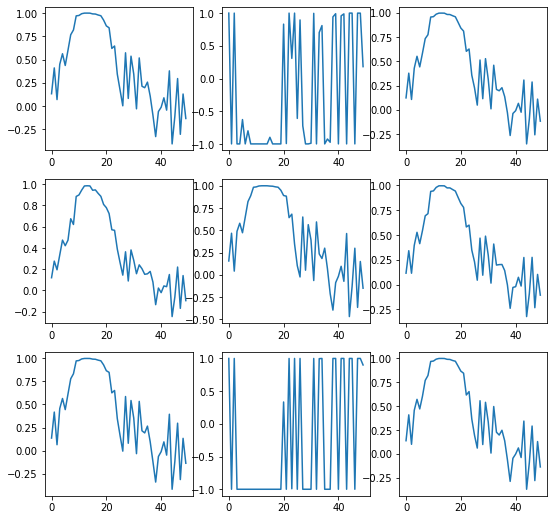

epoch-100; D_loss: 0.5677868723869324; G_loss: 5.466119289398193


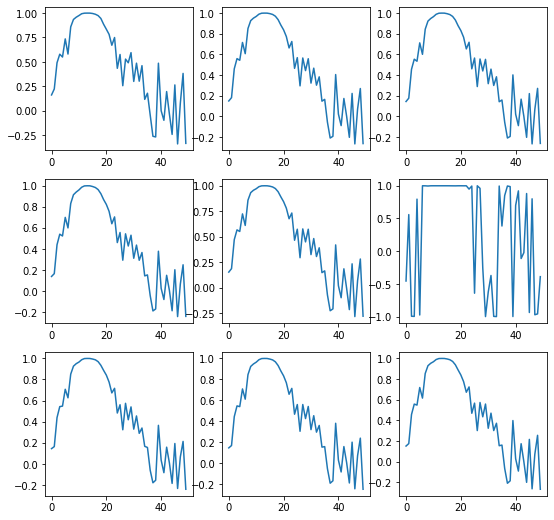

epoch-150; D_loss: 1.3450276851654053; G_loss: 1.6372640132904053


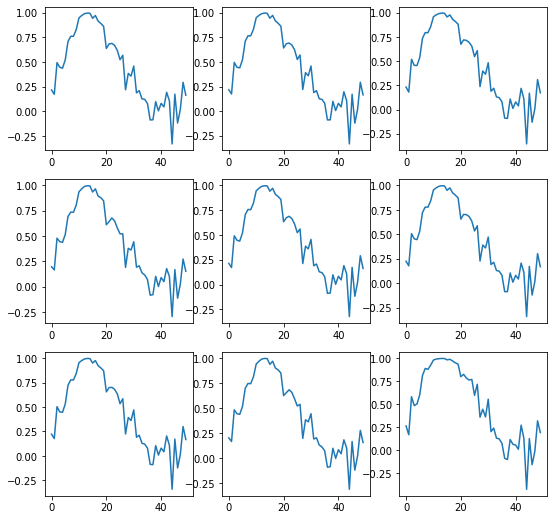

epoch-200; D_loss: 1.5998899936676025; G_loss: 2.7000179290771484


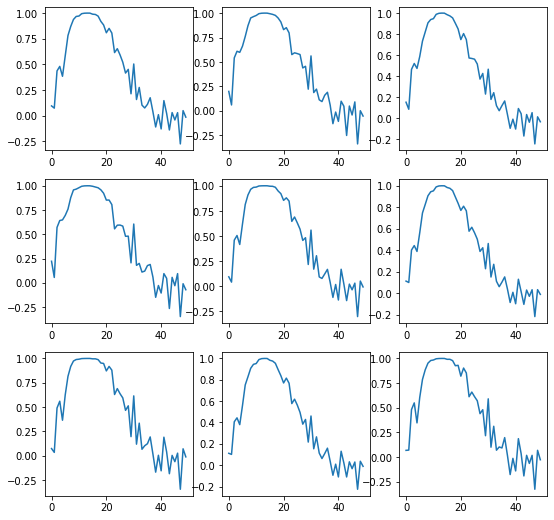

epoch-250; D_loss: 1.6317857503890991; G_loss: 1.1502693891525269


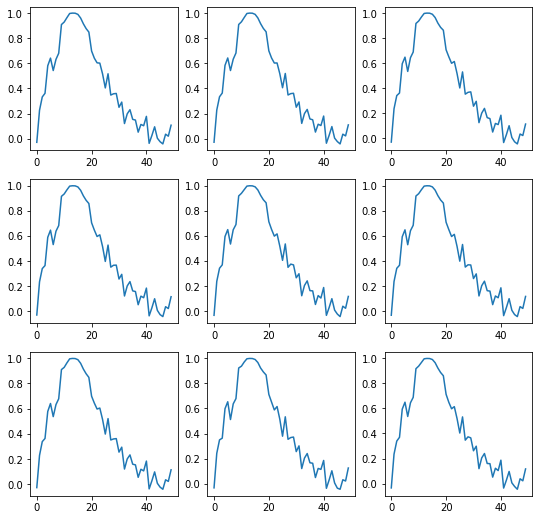

epoch-300; D_loss: 1.2897683382034302; G_loss: 1.0780487060546875


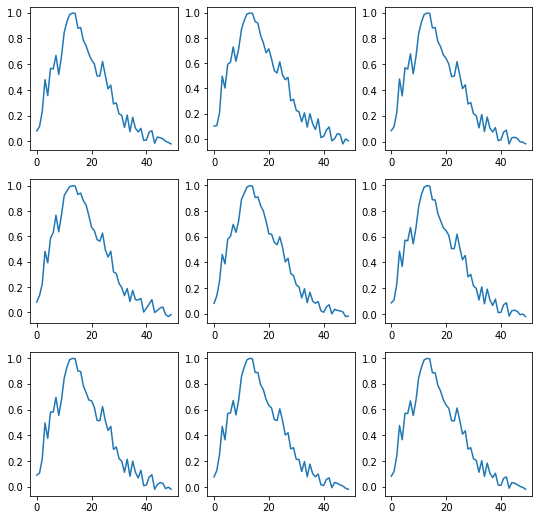

epoch-350; D_loss: 1.4340062141418457; G_loss: 0.674965500831604


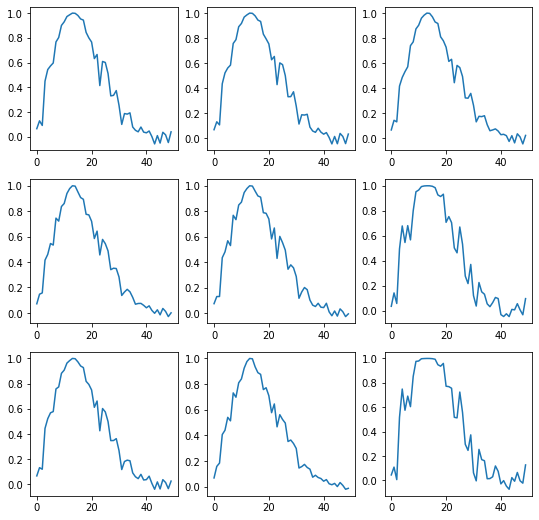

epoch-400; D_loss: 1.685870885848999; G_loss: 1.125084638595581


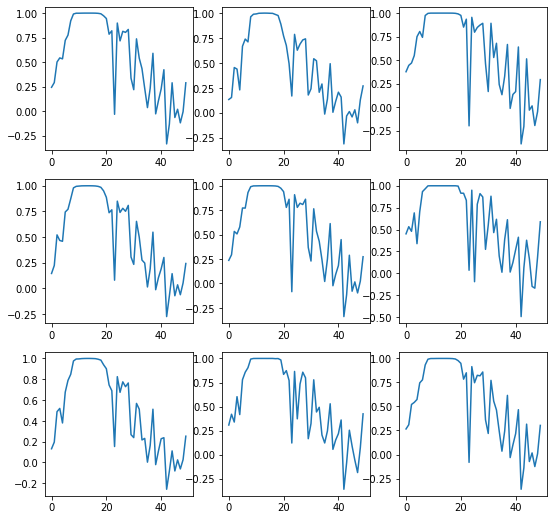

epoch-450; D_loss: 2.7431576251983643; G_loss: 0.22776491940021515


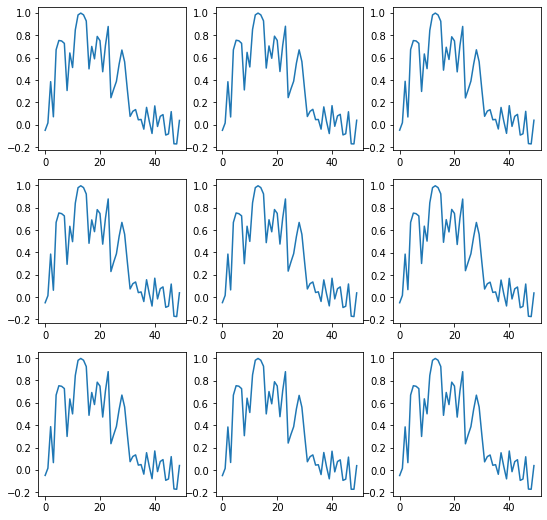

In [4]:
generator = run_train(dataset, \
          latent_dim=LATENT_DIM, \
          sample_size=SAMPLE_SIZE, \
          learning_rate=LEARNING_RATE, \
          num_epochs=NUM_EPOCHS, \
          batch_size=BATCH_SIZE, \
          print_each=PRINT_EACH, \
          verbose=VERBOSE, \
          no_save=NO_SAVE, \
          device=DEVICE)

In [5]:
signal = generate_new_signal(generator)

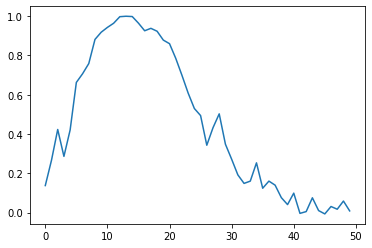

In [6]:
plt.plot(signal)
plt.show()